<a href="https://colab.research.google.com/github/gm1642/genai_cybersecurity/blob/main/cbcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
encrypted_data = []

In [ ]:
import numpy as np

In [ ]:
encrypted_data.append(("c","v7TXfjF8+CyZdvBveAq9Iw==", 123456789101121))

In [ ]:
df = pd.DataFrame(encrypted_data, columns=["Plain Text", "AES Encrypted", "Secret Key"])
df

,Plain Text,AES Encrypted,Secret Key
0,c,v7TXfjF8+CyZdvBveAq9Iw==,123456789101121


In [ ]:
# Split into X_train and y_train
X_train = df[["Plain Text", "AES Encrypted"]]
y_train = df["Secret Key"]

In [ ]:
X_one_hot = pd.get_dummies(X_train)

In [ ]:
X_train

,Plain Text,AES Encrypted
0,c,v7TXfjF8+CyZdvBveAq9Iw==


In [ ]:
y_train

0    123456789101121
Name: Secret Key, dtype: int64

In [ ]:
y_train = np.array(y_train.tolist())

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

# Assuming X_train and y_train are already loaded

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_one_hot.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (adjust as needed)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_one_hot, y_train, epochs=10, batch_size=1)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 15241578313864645299148947456.0000
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 15241578313864645299148947456.0000
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 15241578313864645299148947456.0000
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 15241578313864645299148947456.0000
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 15241578313864645299148947456.0000
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 15241578313864645299148947456.0000
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 15241578313864645299148947456.0000
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 15241578313864645299148947456.0000
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 15241578313864645299148947456.0000
Epoch 10/10
1/1 [==============================] - 0s

In [ ]:
X_test=[]

In [ ]:
X_test.append(("the hacker", "pupETBG1EexxGFNw+Llcjw=="))

In [ ]:
X_test1 = pd.DataFrame(X_test, columns=["Plain Text", "AES Encrypted"])

In [ ]:
ogc= pd.get_dummies(X_test1)

##AES ENCRYPTION BREAKING TEST

In [ ]:
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend
import os

# AES encryption function
def encrypt_aes(plaintext, key, iv):
    backend = default_backend()
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    encryptor = cipher.encryptor()
    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(plaintext) + padder.finalize()
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()
    return ciphertext

# AES decryption function
def decrypt_aes(ciphertext, key, iv):
    backend = default_backend()
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    decryptor = cipher.decryptor()
    unpadder = padding.PKCS7(algorithms.AES.block_size).unpadder()
    padded_plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    plaintext = unpadder.update(padded_plaintext) + unpadder.finalize()
    return plaintext

# Example encrypted texts
key = os.urandom(16)  # AES-128 key
iv = os.urandom(16)   # Initialization vector
plaintexts = [b"secret message 1", b"secret message 2", b"secret message 3"]  # Example plaintexts

# Encrypt the plaintexts
encrypted_texts = [encrypt_aes(plaintext, key, iv) for plaintext in plaintexts]

# Convert to numpy array for easier handling in TensorFlow
encrypted_texts = np.array([np.frombuffer(text, dtype=np.uint8) for text in encrypted_texts])


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Generator model
def build_generator(input_dim, output_dim):
    model = Sequential([
        Dense(256, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        Dense(output_dim, activation='tanh')
    ])
    return model

# Discriminator model
def build_discriminator(input_dim):
    model = Sequential([
        Dense(1024, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Parameters
input_dim = 100  # Dimension of the noise vector for the generator
output_dim = encrypted_texts.shape[1]  # Dimension of the ciphertext

# Build models
generator = build_generator(input_dim, output_dim)
discriminator = build_discriminator(output_dim)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the combined model (generator + discriminator)
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(input_dim,))
generated_text = generator(gan_input)
gan_output = discriminator(generated_text)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


In [ ]:
# Training parameters
batch_size = 64
epochs = 10000
sample_interval = 1000

# Prepare real and fake labels
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Timing the training process
import time
start_time = time.time()

# Training loop
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, encrypted_texts.shape[0], batch_size)
    real_texts = encrypted_texts[idx]

    noise = np.random.normal(0, 1, (batch_size, input_dim))
    generated_texts = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_texts, real)
    d_loss_fake = discriminator.train_on_batch(generated_texts, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, input_dim))
    g_loss = gan.train_on_batch(noise, real)

    # Print the progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time} seconds")

# Generate new encrypted text
noise = np.random.normal(0, 1, (1, input_dim))
generated_text = generator.predict(noise)
print(f"Generated Text: {generated_text}")


2/2 [==============================] - 0s 5ms/step
0 [D loss: 0.6190289556980133 | D accuracy: 37.5] [G loss: 0.6832438707351685]
2/2 [==============================] - 0s 3ms/step


KeyboardInterrupt: 

In [ ]:
# Attempt to decrypt the generated ciphertext
try:
    decrypted_text = decrypt_aes(generated_text.tobytes(), key, iv)
    print("Decrypted text:", decrypted_text)
except Exception as e:
    print("Decryption failed:", e)


Decryption failed: 'KerasTensor' object has no attribute 'tobytes'


##RSA BREAKING TEST (. Side-Channel Attack Simulation)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, LeakyReLU
import rsa

# Generate synthetic side-channel leakage data
def generate_leakage_data(num_samples, seq_length, feature_dim):
    model = Sequential()
    model.add(LSTM(256, input_shape=(seq_length, feature_dim), return_sequences=True))
    model.add(LeakyReLU(alpha=0.01))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dense(feature_dim, activation='sigmoid'))

    noise = np.random.normal(0, 1, (num_samples, seq_length, feature_dim))
    leakage_data = model.predict(noise)
    return leakage_data

# Example usage
num_samples = 1000
seq_length = 100  # Length of the power consumption trace
feature_dim = 1   # Single feature representing power consumption

synthetic_leakage_data = generate_leakage_data(num_samples, seq_length, feature_dim)

# Train a model to predict the cryptographic key based on synthetic leakage data
def train_key_prediction_model(leakage_data, keys):
    model = Sequential()
    model.add(LSTM(256, input_shape=(seq_length, feature_dim)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(len(keys[0]), activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(leakage_data, keys, epochs=10, batch_size=32)
    return model

# Generate RSA keys for the example
(public_key, private_key) = rsa.newkeys(512)
n_bin = bin(private_key.n)[2:]
e_bin = bin(private_key.e)[2:]
d_bin = bin(private_key.d)[2:]
max_len = max(len(n_bin), len(e_bin), len(d_bin))

keys = []

for _ in range(num_samples):
    n_bin_padded = n_bin.zfill(max_len)
    e_bin_padded = e_bin.zfill(max_len)
    d_bin_padded = d_bin.zfill(max_len)
    key = n_bin_padded + e_bin_padded + d_bin_padded
    keys.append(list(map(int, key)))

keys = np.array(keys)

# Train the prediction model
key_prediction_model = train_key_prediction_model(synthetic_leakage_data, keys)

# Use the model to predict keys from new leakage data
new_leakage_data = generate_leakage_data(10, seq_length, feature_dim)
predicted_keys = key_prediction_model.predict(new_leakage_data)

# Convert predicted binary keys back to integers and validate
def bin_to_int(bin_list):
    bin_list = (bin_list > 0.5).astype(int)  # Ensure binary output
    return int("".join(map(str, bin_list)), 2)

correct_predictions = 0
for pk in predicted_keys:
    predicted_n = bin_to_int(pk[:max_len])
    predicted_e = bin_to_int(pk[max_len:2*max_len])
    predicted_d = bin_to_int(pk[2*max_len:])
    if predicted_n == private_key.n and predicted_e == private_key.e and predicted_d == private_key.d:
        correct_predictions += 1

print(f"Number of correct predictions: {correct_predictions}/{len(predicted_keys)}")


32/32 [==============================] - 1s 9ms/step
Epoch 1/10
32/32 [==============================] - 3s 5ms/step - loss: 0.6786 - accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4383 - accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1159 - accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.0000e+00
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.0000e+00
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [============

##Brute Force Attack Simulation

In [ ]:
pip install pycryptodome


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

# Generate synthetic keys using a simple neural network
def generate_keys(num_keys, key_length=32):
    model = Sequential()
    model.add(Dense(256, input_dim=key_length))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(key_length, activation='sigmoid'))

    noise = np.random.normal(0, 1, (num_keys, key_length))
    generated_keys = model.predict(noise)
    return generated_keys

# Example usage
num_keys_to_generate = 10000
key_length = 16  # AES key length in bytes (128-bit)

synthetic_keys = generate_keys(num_keys_to_generate, key_length)

# Encrypt some data with a known key
known_key = AES.get_random_bytes(key_length)
cipher = AES.new(known_key, AES.MODE_CBC)
iv = cipher.iv
plaintext = b"Secret Message"
encrypted_data = cipher.encrypt(pad(plaintext, AES.block_size))

# Test generated keys to find the correct one
for synthetic_key in synthetic_keys:
    try:
        synthetic_cipher = AES.new(synthetic_key, AES.MODE_CBC, iv)
        decrypted_data = unpad(synthetic_cipher.decrypt(encrypted_data), AES.block_size)
        if decrypted_data == plaintext:
            print(f"Key found: {synthetic_key}")
            break
    except Exception as e:
        continue


313/313 [==============================] - 0s 1ms/step


##enchancing the attack on AES

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from Crypto.Cipher import AES

# Generate training keys
def generate_training_keys(num_keys, key_length=16):
    return np.random.randint(0, 256, (num_keys, key_length)).astype(np.float32) / 255.0

# Train the neural network on real keys
def train_key_generator(training_keys):
    model = Sequential()
    model.add(Dense(256, input_dim=training_keys.shape[1]))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(training_keys.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(training_keys, training_keys, epochs=50, batch_size=64, verbose=1)
    return model

# Generate and train on actual keys
num_training_keys = 10000
key_length = 16  # AES key length in bytes (128-bit)
training_keys = generate_training_keys(num_training_keys, key_length)

key_generator_model = train_key_generator(training_keys)

# Generate synthetic keys using the trained model
num_keys_to_generate = 10000
noise = np.random.normal(0, 1, (num_keys_to_generate, key_length)).astype(np.float32)
synthetic_keys = key_generator_model.predict(noise)


Epoch 1/50
157/157 [==============================] - 4s 7ms/step - loss: 0.0384
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0018
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 9.6014e-04
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 9.0101e-04
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 8.9383e-04
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 8.9045e-04
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 8.8921e-04
Epoch 9/50
157/157 [==============================] - 1s 4ms/step - loss: 8.9153e-04
Epoch 10/50
157/157 [==============================] - 1s 3ms/step - loss: 8.9029e-04
Epoch 11/50
157/157 [==============================] - 1s 5ms/step - loss: 8.8895e-04
Epoch 12/50
157/157 [==============================] - 1s 6ms/step - loss: 

In [ ]:
from Crypto.Util.Padding import pad, unpad

# Encrypt some data with a known key
known_key = AES.get_random_bytes(key_length)
cipher = AES.new(known_key, AES.MODE_CBC)
iv = cipher.iv
plaintext = b"Secret Message"
encrypted_data = cipher.encrypt(pad(plaintext, AES.block_size))

# Test generated keys to find the correct one
for synthetic_key in synthetic_keys:
    try:
        synthetic_key = (synthetic_key * 255).astype(np.uint8).tobytes()  # Scale back to byte values
        synthetic_cipher = AES.new(synthetic_key, AES.MODE_CBC, iv)
        decrypted_data = unpad(synthetic_cipher.decrypt(encrypted_data), AES.block_size)
        if decrypted_data == plaintext:
            print(f"Key found: {synthetic_key}")
            break
    except Exception as e:
        continue
else:
    print("No key found using this method.")


No key found using this method.


##Differential Power Analysis (DPA)

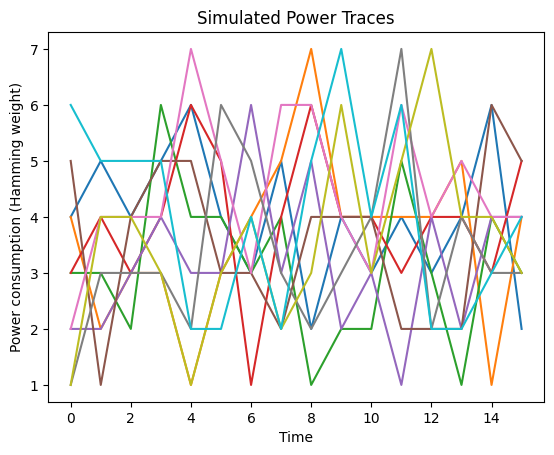

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

# Simulate power consumption model (Hamming weight model for simplicity)
def power_model(data):
    return np.array([bin(x).count('1') for x in data])

# Generate synthetic plaintexts and corresponding power traces
def generate_traces(num_traces, key):
    key_length = len(key)
    plaintexts = np.random.randint(0, 256, (num_traces, key_length)).astype(np.uint8)
    power_traces = []

    for pt in plaintexts:
        cipher = AES.new(key, AES.MODE_ECB)
        padded_pt = pad(bytes(pt), AES.block_size)  # Convert to bytes before padding
        encrypted = cipher.encrypt(padded_pt)
        intermediate_values = encrypted[:key_length]  # Just as an example
        power_trace = power_model(intermediate_values)
        power_traces.append(power_trace)

    return plaintexts, np.array(power_traces)

# Example known key
known_key = AES.get_random_bytes(16)
num_traces = 1000
plaintexts, power_traces = generate_traces(num_traces, known_key)

# Visualize power traces (optional)
plt.plot(power_traces[:10].T)
plt.xlabel('Time')
plt.ylabel('Power consumption (Hamming weight)')
plt.title('Simulated Power Traces')
plt.show()


In [ ]:
from scipy.stats import pearsonr

def recover_key_byte(traces, plaintexts, byte_index):
    num_traces, num_points = traces.shape
    key_guesses = np.arange(256)
    correlations = np.zeros((256, num_points))

    for guess in key_guesses:
        hypothetical_values = [AES.new(bytes([guess] * 16), AES.MODE_ECB).encrypt(pad(bytes([pt[byte_index]] * 16), AES.block_size))[0] for pt in plaintexts]
        hypothetical_power = power_model(hypothetical_values)
        for point in range(num_points):
            correlations[guess, point], _ = pearsonr(hypothetical_power, traces[:, point])

    # Find the best guess based on maximum absolute correlation
    max_correlation_index = np.unravel_index(np.argmax(np.abs(correlations)), correlations.shape)
    best_guess = key_guesses[max_correlation_index[0]]
    return best_guess, correlations

# Recover each key byte
recovered_key = []
for i in range(16):
    best_guess, _ = recover_key_byte(power_traces, plaintexts, i)
    recovered_key.append(best_guess)

recovered_key = bytes(recovered_key)
print(f"Known key:     {known_key}")
print(f"Recovered key: {recovered_key}")


Known key:     b':}\r\x18\x8d\x05\x0e\x0bK\x8cwp\xa4-\xd2\x8a'
Recovered key: b'q\xdc\nD\x86\xd0\xa7~\xae\x00\xc1Pt/C\xc3'


Example of Using a Dataset from ASCAD

In [ ]:
cd ASCAD/ATMEGA_AES_v1/ATM_AES_v1_fixed_key/

[Errno 2] No such file or directory: 'ASCAD/ATMEGA_AES_v1/ATM_AES_v1_fixed_key/'
/content


In [ ]:
!wget https://www.data.gouv.fr/s/resources/ascad/20180530-163000/ASCAD_data.zip

--2024-06-28 05:35:53--  https://www.data.gouv.fr/s/resources/ascad/20180530-163000/ASCAD_data.zip
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.73, 37.59.183.91
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4435199469 (4.1G) [application/zip]
Saving to: ‘ASCAD_data.zip’

ASCAD_data.zip      100%[===================>]   4.13G  13.2MB/s    in 5m 32s  

2024-06-28 05:41:25 (12.8 MB/s) - ‘ASCAD_data.zip’ saved [4435199469/4435199469]



In [ ]:
!pip install h5py

In [ ]:
!unzip ASCAD_data.zip

Archive:  ASCAD_data.zip
   creating: ASCAD_data/
   creating: ASCAD_data/ASCAD_databases/
  inflating: ASCAD_data/ASCAD_databases/ASCAD.h5  
  inflating: ASCAD_data/ASCAD_databases/ASCAD_desync100.h5  
  inflating: ASCAD_data/ASCAD_databases/ASCAD_desync50.h5  
  inflating: ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5  
   creating: ASCAD_data/ASCAD_trained_models/
  inflating: ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync0_epochs75_classes256_batchsize200.h5  
  inflating: ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync100_epochs75_classes256_batchsize200.h5  
  inflating: ASCAD_data/ASCAD_trained_models/cnn_best_ascad_desync50_epochs75_classes256_batchsize200.h5  
  inflating: ASCAD_data/ASCAD_trained_models/mlp_best_ascad_desync0_node200_layernb6_epochs200_classes256_batchsize100.h5  
  inflating: ASCAD_data/ASCAD_trained_models/mlp_best_ascad_desync100_node200_layernb6_epochs200_classes256_batchsize100.h5  
  inflating: ASCAD_data/ASCAD_trained_models/mlp_best

In [ ]:
import h5py
import numpy as np
import pandas as pd

# Path to the ASCAD database
ascad_dataset_path = "/content/ASCAD_data/ASCAD_databases/ASCAD.h5"

# Load the data
with h5py.File(ascad_dataset_path, 'r') as f:
    # Load profiling traces
    profiling_traces = np.array(f['Profiling_traces/traces'], dtype=np.float32)
    # Assuming the labels/metadata is in 'Profiling_traces/metadata/key'
    # Adjust the path if your labels are stored differently
    profiling_labels = np.array(f['Profiling_traces/metadata']['key'], dtype=np.uint8)

# Convert to DataFrame
df_traces = pd.DataFrame(profiling_traces)

# Assuming profiling_labels is a (50000, 16) array and each column represents different metadata
# Adjust column names as per your data's context
columns_labels = ['Key1', 'Key2', 'Key3', 'Key4', 'Key5', 'Key6', 'Key7', 'Key8',
                  'Key9', 'Key10', 'Key11', 'Key12', 'Key13', 'Key14', 'Key15', 'Key16']
df_labels = pd.DataFrame(profiling_labels, columns=columns_labels)

# Concatenate labels with traces for a combined DataFrame
df = pd.concat([df_traces, df_labels], axis=1)

# Display the DataFrame
print(df.head())

      0     1     2     3    4     5     6     7     8     9  ...  Key7  Key8  \
0  20.0  19.0  13.0   6.0 -2.0 -10.0 -19.0 -29.0 -39.0 -47.0  ...   254    16   
1  22.0  20.0  15.0   8.0 -1.0  -9.0 -19.0 -30.0 -39.0 -48.0  ...   254    16   
2  24.0  22.0  18.0  12.0  3.0  -6.0 -15.0 -24.0 -34.0 -43.0  ...   254    16   
3  24.0  23.0  18.0  11.0  2.0  -6.0 -16.0 -26.0 -37.0 -45.0  ...   254    16   
4  21.0  20.0  16.0   9.0  1.0  -6.0 -16.0 -24.0 -34.0 -43.0  ...   254    16   

   Key9  Key10  Key11  Key12  Key13  Key14  Key15  Key16  
0   167    141     74    220    142     73      4    105  
1   167    141     74    220    142     73      4    105  
2   167    141     74    220    142     73      4    105  
3   167    141     74    220    142     73      4    105  
4   167    141     74    220    142     73      4    105  

[5 rows x 716 columns]


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,Key7,Key8,Key9,Key10,Key11,Key12,Key13,Key14,Key15,Key16
0,20.0,19.0,13.0,6.0,-2.0,-10.0,-19.0,-29.0,-39.0,-47.0,...,254,16,167,141,74,220,142,73,4,105
1,22.0,20.0,15.0,8.0,-1.0,-9.0,-19.0,-30.0,-39.0,-48.0,...,254,16,167,141,74,220,142,73,4,105
2,24.0,22.0,18.0,12.0,3.0,-6.0,-15.0,-24.0,-34.0,-43.0,...,254,16,167,141,74,220,142,73,4,105
3,24.0,23.0,18.0,11.0,2.0,-6.0,-16.0,-26.0,-37.0,-45.0,...,254,16,167,141,74,220,142,73,4,105
4,21.0,20.0,16.0,9.0,1.0,-6.0,-16.0,-24.0,-34.0,-43.0,...,254,16,167,141,74,220,142,73,4,105


In [ ]:
column_name = df.columns[715]
print(column_name)

Key16


In [ ]:
import h5py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, LeakyReLU

# Load the ASCAD dataset
ascad_dataset_path = r'/content/ASCAD_data/ASCAD_databases/ASCAD.h5'
with h5py.File(ascad_dataset_path, 'r') as f:
    profiling_traces = np.array(f['Profiling_traces/traces'], dtype=np.float32)
    profiling_labels = np.array(f['Profiling_traces/metadata']['key'], dtype=np.uint8)
    attack_traces = np.array(f['Attack_traces/traces'], dtype=np.float32)
    attack_labels = np.array(f['Attack_traces/metadata']['key'], dtype=np.uint8)

# Normalize the power traces
def normalize_traces(traces):
    normalized_traces = []
    for trace in traces:
        trace = trace - np.mean(trace)
        min_val = np.min(trace)
        max_val = np.max(trace)
        trace = (trace - min_val) / (max_val - min_val)
        normalized_traces.append(trace)
    return np.array(normalized_traces)

normalized_profiling_traces = normalize_traces(profiling_traces)
normalized_attack_traces = normalize_traces(attack_traces)

# Ensure keys are in the correct format (binary array)
def convert_keys_to_binary(keys):
    binary_keys = []
    for key in keys:
        bin_key = ''.join(format(byte, '08b') for byte in key)
        binary_keys.append(list(map(int, bin_key)))
    return np.array(binary_keys)

profiling_labels = convert_keys_to_binary(profiling_labels)
attack_labels = convert_keys_to_binary(attack_labels)

# Ensure the shape of traces and keys are consistent
assert normalized_profiling_traces.shape[0] == profiling_labels.shape[0], "Number of profiling traces and labels must match"
assert normalized_attack_traces.shape[0] == attack_labels.shape[0], "Number of attack traces and labels must match"

# Prepare data for model training
num_samples, seq_length = normalized_profiling_traces.shape
feature_dim = 1
normalized_profiling_traces = normalized_profiling_traces.reshape((num_samples, seq_length, feature_dim))
normalized_attack_traces = normalized_attack_traces.reshape((normalized_attack_traces.shape[0], seq_length, feature_dim))

# Define and train the model
def train_key_prediction_model(traces, keys):
    model = Sequential()
    model.add(LSTM(256, input_shape=(seq_length, feature_dim)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(keys.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(traces, keys, epochs=10, batch_size=32)
    return model

# Train the prediction model
key_prediction_model = train_key_prediction_model(normalized_profiling_traces, profiling_labels)

# Save the trained model
key_prediction_model.save('key_prediction_model.h5')

print("Model training complete and saved.")

# Use the model to predict keys from new leakage data (attack traces)
predicted_keys = key_prediction_model.predict(normalized_attack_traces)

# Convert predicted binary keys back to integers and validate
def bin_to_int(bin_list):
    bin_list = (bin_list > 0.5).astype(int)  # Ensure binary output
    return int("".join(map(str, bin_list)), 2)

correct_predictions = 0
for pk in predicted_keys:
    predicted_key = [bin_to_int(pk[i*8:(i+1)*8]) for i in range(16)]
    if predicted_key == list(attack_labels[correct_predictions]):
        correct_predictions += 1

print(f"Number of correct predictions: {correct_predictions}/{len(predicted_keys)}")


Epoch 1/10
1563/1563 [==============================] - 52s 30ms/step - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 3.8018e-05 - accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1901e-05 - accuracy: 0.0000e+00
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 4.7388e-06 - accuracy: 0.0000e+00
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.0621e-06 - accuracy: 0.0000e+00
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 9.3838e-07 - accuracy: 0.0000e+00
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 4.4187e-07 - accuracy: 0.0000e+00
Epoch 8/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.1652e-07 - accuracy: 0.0000e+00
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1234e-07 - accuracy: 0.0000e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model training complete and saved.
313/313 [==============================] - 5s 13ms/step
Number of correct predictions: 0/10000


#improved code

In [ ]:
import os
import sys
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

def check_file_exists(file_path):
    file_path = os.path.normpath(file_path)
    if not os.path.exists(file_path):
        print(f"Error: provided file path '{file_path}' does not exist!")
        sys.exit(-1)
    return

def mlp_best(node=200, layer_nb=6, input_dim=1400):
    model = Sequential()
    model.add(Dense(node, input_dim=input_dim, activation='relu'))
    for _ in range(layer_nb-2):
        model.add(Dense(node, activation='relu'))
    model.add(Dense(256, activation='softmax'))
    optimizer = RMSprop(learning_rate=0.00001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def cnn_best(classes=256, input_dim=700):
    input_shape = (input_dim, 1)
    img_input = Input(shape=input_shape)
    x = Conv1D(64, 11, activation='relu', padding='same', name='block1_conv1')(img_input)
    x = AveragePooling1D(2, strides=2, name='block1_pool')(x)
    x = Conv1D(128, 11, activation='relu', padding='same', name='block2_conv1')(x)
    x = AveragePooling1D(2, strides=2, name='block2_pool')(x)
    x = Conv1D(256, 11, activation='relu', padding='same', name='block3_conv1')(x)
    x = AveragePooling1D(2, strides=2, name='block3_pool')(x)
    x = Conv1D(512, 11, activation='relu', padding='same', name='block4_conv1')(x)
    x = AveragePooling1D(2, strides=2, name='block4_pool')(x)
    x = Conv1D(512, 11, activation='relu', padding='same', name='block5_conv1')(x)
    x = AveragePooling1D(2, strides=2, name='block5_pool')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name='cnn_best')
    optimizer = RMSprop(learning_rate=0.00001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def load_sca_model(model_file):
    check_file_exists(model_file)
    try:
        model = load_model(model_file)
    except:
        print(f"Error: can't load Keras model file '{model_file}'")
        sys.exit(-1)
    return model

def load_ascad(ascad_database_file, load_metadata=False):
    check_file_exists(ascad_database_file)
    try:
        in_file = h5py.File(ascad_database_file, "r")
    except:
        print(f"Error: can't open HDF5 file '{ascad_database_file}' for reading (it might be malformed) ...")
        sys.exit(-1)
    X_profiling = np.array(in_file['Profiling_traces/traces'], dtype=np.int8)
    Y_profiling = np.array(in_file['Profiling_traces/labels'])
    X_attack = np.array(in_file['Attack_traces/traces'], dtype=np.int8)
    Y_attack = np.array(in_file['Attack_traces/labels'])
    if load_metadata:
        return (X_profiling, Y_profiling), (X_attack, Y_attack), (in_file['Profiling_traces/metadata'], in_file['Attack_traces/metadata'])
    return (X_profiling, Y_profiling), (X_attack, Y_attack)

def train_model(X_profiling, Y_profiling, model, save_file_name, epochs=150, batch_size=100, validation_split=0, early_stopping=0):
    check_file_exists(os.path.dirname(save_file_name))
    save_model = ModelCheckpoint(save_file_name, save_best_only=True)
    callbacks = [save_model]
    if early_stopping:
        if not validation_split:
            validation_split = 0.1
        callbacks.append(EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True))
    input_layer_shape = model.get_layer(index=0).input_shape[1]
    if input_layer_shape != len(X_profiling[0]):
        print(f"Error: model input shape {input_layer_shape} instead of {len(X_profiling[0])} is not expected ...")
        sys.exit(-1)
    if len(model.input_shape) == 2:
        Reshaped_X_profiling = X_profiling
    elif len(model.input_shape) == 3:
        Reshaped_X_profiling = X_profiling.reshape((X_profiling.shape[0], X_profiling.shape[1], 1))
    else:
        print(f"Error: model input shape length {len(model.input_shape)} is not expected ...")
        sys.exit(-1)
    y = to_categorical(Y_profiling, num_classes=256)
    history = model.fit(Reshaped_X_profiling, y, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=callbacks)
    return history

if __name__ == "__main__":
    if len(sys.argv) != 2:
        ascad_database = "/content/ASCAD_data/ASCAD_databases/ASCAD.h5"
        network_type = "mlp"
        training_model = "/content/ASCAD_data/ASCAD_trained_models/mlp_best_ascad_desync100_node200_layernb6_epochs200_classes256_batchsize100.h5"
        validation_split = 0
        train_len = 0
        epochs = 75
        batch_size = 200
    else:
        # Add a function or logic to read parameters from file
        pass

    (X_profiling, Y_profiling), (X_attack, Y_attack) = load_ascad(ascad_database)

    if network_type == "mlp":
        best_model = mlp_best(input_dim=len(X_profiling[0]))
    elif network_type == "cnn":
        best_model = cnn_best(input_dim=len(X_profiling[0]))
    elif network_type == "cnn2":
        best_model = cnn_best2(input_dim=len(X_profiling[0]))
    else:
        print(f"Error: no topology found for network '{network_type}' ...")
        sys.exit(-1)

    if train_len:
        train_model(X_profiling[:train_len], Y_profiling[:train_len], best_model, training_model, epochs, batch_size, validation_split=validation_split)
    else:
        train_model(X_profiling, Y_profiling, best_model, training_model, epochs, batch_size, validation_split=validation_split)


Epoch 1/75
250/250 [==============================] - ETA: 0s - loss: 7.7666 - accuracy: 0.0041

250/250 [==============================] - 2s 4ms/step - loss: 7.7666 - accuracy: 0.0041
Epoch 2/75
240/250 [===========================>..] - ETA: 0s - loss: 5.6136 - accuracy: 0.0041

250/250 [==============================] - 1s 4ms/step - loss: 5.6125 - accuracy: 0.0040
Epoch 3/75
244/250 [============================>.] - ETA: 0s - loss: 5.5705 - accuracy: 0.0037

250/250 [==============================] - 1s 5ms/step - loss: 5.5703 - accuracy: 0.0037
Epoch 4/75
236/250 [===========================>..] - ETA: 0s - loss: 5.5590 - accuracy: 0.0038

250/250 [==============================] - 1s 5ms/step - loss: 5.5592 - accuracy: 0.0037
Epoch 5/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5548 - accuracy: 0.0040

250/250 [==============================] - 1s 4ms/step - loss: 5.5546 - accuracy: 0.0040
Epoch 6/75
239/250 [===========================>..] - ETA: 0s - loss: 5.5511 - accuracy: 0.0039

250/250 [==============================] - 1s 3ms/step - loss: 5.5511 - accuracy: 0.0039
Epoch 7/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5491 - accuracy: 0.0047

250/250 [==============================] - 1s 3ms/step - loss: 5.5493 - accuracy: 0.0047
Epoch 8/75
245/250 [============================>.] - ETA: 0s - loss: 5.5479 - accuracy: 0.0042

250/250 [==============================] - 1s 4ms/step - loss: 5.5479 - accuracy: 0.0042
Epoch 9/75
246/250 [============================>.] - ETA: 0s - loss: 5.5471 - accuracy: 0.0041

250/250 [==============================] - 1s 4ms/step - loss: 5.5470 - accuracy: 0.0040
Epoch 10/75
236/250 [===========================>..] - ETA: 0s - loss: 5.5459 - accuracy: 0.0044

250/250 [==============================] - 1s 3ms/step - loss: 5.5460 - accuracy: 0.0044
Epoch 11/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5456 - accuracy: 0.0044

250/250 [==============================] - 1s 3ms/step - loss: 5.5456 - accuracy: 0.0043
Epoch 12/75
246/250 [============================>.] - ETA: 0s - loss: 5.5454 - accuracy: 0.0043

250/250 [==============================] - 1s 4ms/step - loss: 5.5454 - accuracy: 0.0043
Epoch 13/75
247/250 [============================>.] - ETA: 0s - loss: 5.5448 - accuracy: 0.0045

250/250 [==============================] - 1s 4ms/step - loss: 5.5448 - accuracy: 0.0045
Epoch 14/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5446 - accuracy: 0.0046

250/250 [==============================] - 1s 4ms/step - loss: 5.5447 - accuracy: 0.0047
Epoch 15/75
250/250 [==============================] - ETA: 0s - loss: 5.5445 - accuracy: 0.0046

250/250 [==============================] - 1s 4ms/step - loss: 5.5445 - accuracy: 0.0046
Epoch 16/75
248/250 [============================>.] - ETA: 0s - loss: 5.5441 - accuracy: 0.0043

250/250 [==============================] - 1s 5ms/step - loss: 5.5441 - accuracy: 0.0043
Epoch 17/75
238/250 [===========================>..] - ETA: 0s - loss: 5.5439 - accuracy: 0.0045

250/250 [==============================] - 1s 5ms/step - loss: 5.5440 - accuracy: 0.0046
Epoch 18/75
238/250 [===========================>..] - ETA: 0s - loss: 5.5435 - accuracy: 0.0050

250/250 [==============================] - 1s 3ms/step - loss: 5.5435 - accuracy: 0.0051
Epoch 19/75
246/250 [============================>.] - ETA: 0s - loss: 5.5436 - accuracy: 0.0045

250/250 [==============================] - 1s 4ms/step - loss: 5.5436 - accuracy: 0.0044
Epoch 20/75
248/250 [============================>.] - ETA: 0s - loss: 5.5430 - accuracy: 0.0050

250/250 [==============================] - 1s 4ms/step - loss: 5.5431 - accuracy: 0.0050
Epoch 21/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5431 - accuracy: 0.0043

250/250 [==============================] - 1s 4ms/step - loss: 5.5431 - accuracy: 0.0045
Epoch 22/75
247/250 [============================>.] - ETA: 0s - loss: 5.5429 - accuracy: 0.0049

250/250 [==============================] - 1s 4ms/step - loss: 5.5428 - accuracy: 0.0048
Epoch 23/75
235/250 [===========================>..] - ETA: 0s - loss: 5.5420 - accuracy: 0.0052

250/250 [==============================] - 1s 4ms/step - loss: 5.5422 - accuracy: 0.0052
Epoch 24/75
248/250 [============================>.] - ETA: 0s - loss: 5.5424 - accuracy: 0.0047

250/250 [==============================] - 1s 4ms/step - loss: 5.5423 - accuracy: 0.0047
Epoch 25/75
245/250 [============================>.] - ETA: 0s - loss: 5.5422 - accuracy: 0.0051

250/250 [==============================] - 1s 3ms/step - loss: 5.5423 - accuracy: 0.0051
Epoch 26/75
243/250 [============================>.] - ETA: 0s - loss: 5.5421 - accuracy: 0.0051

250/250 [==============================] - 1s 3ms/step - loss: 5.5421 - accuracy: 0.0051
Epoch 27/75
248/250 [============================>.] - ETA: 0s - loss: 5.5419 - accuracy: 0.0047

250/250 [==============================] - 1s 4ms/step - loss: 5.5419 - accuracy: 0.0048
Epoch 28/75
243/250 [============================>.] - ETA: 0s - loss: 5.5418 - accuracy: 0.0050

250/250 [==============================] - 1s 4ms/step - loss: 5.5417 - accuracy: 0.0050
Epoch 29/75
249/250 [============================>.] - ETA: 0s - loss: 5.5412 - accuracy: 0.0050

250/250 [==============================] - 1s 6ms/step - loss: 5.5412 - accuracy: 0.0050
Epoch 30/75
244/250 [============================>.] - ETA: 0s - loss: 5.5412 - accuracy: 0.0053

250/250 [==============================] - 1s 5ms/step - loss: 5.5411 - accuracy: 0.0054
Epoch 31/75
249/250 [============================>.] - ETA: 0s - loss: 5.5409 - accuracy: 0.0047

250/250 [==============================] - 1s 4ms/step - loss: 5.5409 - accuracy: 0.0047
Epoch 32/75
248/250 [============================>.] - ETA: 0s - loss: 5.5405 - accuracy: 0.0050

250/250 [==============================] - 1s 4ms/step - loss: 5.5405 - accuracy: 0.0049
Epoch 33/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5402 - accuracy: 0.0049

250/250 [==============================] - 1s 4ms/step - loss: 5.5402 - accuracy: 0.0050
Epoch 34/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5405 - accuracy: 0.0051

250/250 [==============================] - 1s 3ms/step - loss: 5.5403 - accuracy: 0.0052
Epoch 35/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5402 - accuracy: 0.0048

250/250 [==============================] - 1s 3ms/step - loss: 5.5403 - accuracy: 0.0047
Epoch 36/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5396 - accuracy: 0.0052

250/250 [==============================] - 1s 3ms/step - loss: 5.5396 - accuracy: 0.0052
Epoch 37/75
238/250 [===========================>..] - ETA: 0s - loss: 5.5395 - accuracy: 0.0050

250/250 [==============================] - 1s 4ms/step - loss: 5.5395 - accuracy: 0.0050
Epoch 38/75
237/250 [===========================>..] - ETA: 0s - loss: 5.5392 - accuracy: 0.0050

250/250 [==============================] - 1s 4ms/step - loss: 5.5393 - accuracy: 0.0051
Epoch 39/75
237/250 [===========================>..] - ETA: 0s - loss: 5.5390 - accuracy: 0.0054

250/250 [==============================] - 1s 4ms/step - loss: 5.5390 - accuracy: 0.0054
Epoch 40/75
237/250 [===========================>..] - ETA: 0s - loss: 5.5388 - accuracy: 0.0052

250/250 [==============================] - 1s 4ms/step - loss: 5.5388 - accuracy: 0.0051
Epoch 41/75
244/250 [============================>.] - ETA: 0s - loss: 5.5384 - accuracy: 0.0059

250/250 [==============================] - 1s 4ms/step - loss: 5.5385 - accuracy: 0.0058
Epoch 42/75
250/250 [==============================] - ETA: 0s - loss: 5.5382 - accuracy: 0.0051

250/250 [==============================] - 1s 6ms/step - loss: 5.5382 - accuracy: 0.0051
Epoch 43/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5383 - accuracy: 0.0052

250/250 [==============================] - 1s 5ms/step - loss: 5.5383 - accuracy: 0.0052
Epoch 44/75
241/250 [===========================>..] - ETA: 0s - loss: 5.5377 - accuracy: 0.0056

250/250 [==============================] - 1s 4ms/step - loss: 5.5376 - accuracy: 0.0057
Epoch 45/75
249/250 [============================>.] - ETA: 0s - loss: 5.5376 - accuracy: 0.0054

250/250 [==============================] - 1s 4ms/step - loss: 5.5376 - accuracy: 0.0054
Epoch 46/75
247/250 [============================>.] - ETA: 0s - loss: 5.5375 - accuracy: 0.0058

250/250 [==============================] - 1s 4ms/step - loss: 5.5374 - accuracy: 0.0058
Epoch 47/75
250/250 [==============================] - ETA: 0s - loss: 5.5370 - accuracy: 0.0052

250/250 [==============================] - 1s 4ms/step - loss: 5.5370 - accuracy: 0.0052
Epoch 48/75
242/250 [============================>.] - ETA: 0s - loss: 5.5371 - accuracy: 0.0056

250/250 [==============================] - 1s 4ms/step - loss: 5.5370 - accuracy: 0.0057
Epoch 49/75
238/250 [===========================>..] - ETA: 0s - loss: 5.5365 - accuracy: 0.0056

250/250 [==============================] - 1s 4ms/step - loss: 5.5365 - accuracy: 0.0056
Epoch 50/75
245/250 [============================>.] - ETA: 0s - loss: 5.5361 - accuracy: 0.0055

250/250 [==============================] - 1s 4ms/step - loss: 5.5362 - accuracy: 0.0054
Epoch 51/75
242/250 [============================>.] - ETA: 0s - loss: 5.5363 - accuracy: 0.0057

250/250 [==============================] - 1s 4ms/step - loss: 5.5363 - accuracy: 0.0057
Epoch 52/75
239/250 [===========================>..] - ETA: 0s - loss: 5.5362 - accuracy: 0.0057

250/250 [==============================] - 1s 4ms/step - loss: 5.5361 - accuracy: 0.0057
Epoch 53/75
249/250 [============================>.] - ETA: 0s - loss: 5.5357 - accuracy: 0.0050

250/250 [==============================] - 1s 4ms/step - loss: 5.5357 - accuracy: 0.0050
Epoch 54/75
243/250 [============================>.] - ETA: 0s - loss: 5.5354 - accuracy: 0.0053

250/250 [==============================] - 1s 4ms/step - loss: 5.5354 - accuracy: 0.0052
Epoch 55/75
248/250 [============================>.] - ETA: 0s - loss: 5.5348 - accuracy: 0.0064

250/250 [==============================] - 1s 5ms/step - loss: 5.5348 - accuracy: 0.0063
Epoch 56/75
248/250 [============================>.] - ETA: 0s - loss: 5.5349 - accuracy: 0.0060

250/250 [==============================] - 1s 5ms/step - loss: 5.5349 - accuracy: 0.0060
Epoch 57/75
236/250 [===========================>..] - ETA: 0s - loss: 5.5346 - accuracy: 0.0061

250/250 [==============================] - 1s 4ms/step - loss: 5.5345 - accuracy: 0.0061
Epoch 58/75
237/250 [===========================>..] - ETA: 0s - loss: 5.5342 - accuracy: 0.0055

250/250 [==============================] - 1s 4ms/step - loss: 5.5341 - accuracy: 0.0055
Epoch 59/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5339 - accuracy: 0.0059

250/250 [==============================] - 1s 4ms/step - loss: 5.5339 - accuracy: 0.0059
Epoch 60/75
245/250 [============================>.] - ETA: 0s - loss: 5.5339 - accuracy: 0.0058

250/250 [==============================] - 1s 4ms/step - loss: 5.5338 - accuracy: 0.0058
Epoch 61/75
250/250 [==============================] - ETA: 0s - loss: 5.5335 - accuracy: 0.0057

250/250 [==============================] - 1s 4ms/step - loss: 5.5335 - accuracy: 0.0057
Epoch 62/75
246/250 [============================>.] - ETA: 0s - loss: 5.5331 - accuracy: 0.0061

250/250 [==============================] - 1s 4ms/step - loss: 5.5332 - accuracy: 0.0061
Epoch 63/75
250/250 [==============================] - ETA: 0s - loss: 5.5329 - accuracy: 0.0062

250/250 [==============================] - 1s 4ms/step - loss: 5.5329 - accuracy: 0.0062
Epoch 64/75
248/250 [============================>.] - ETA: 0s - loss: 5.5325 - accuracy: 0.0062

250/250 [==============================] - 1s 4ms/step - loss: 5.5326 - accuracy: 0.0063
Epoch 65/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5327 - accuracy: 0.0060

250/250 [==============================] - 1s 4ms/step - loss: 5.5325 - accuracy: 0.0060
Epoch 66/75
243/250 [============================>.] - ETA: 0s - loss: 5.5322 - accuracy: 0.0064

250/250 [==============================] - 1s 3ms/step - loss: 5.5321 - accuracy: 0.0063
Epoch 67/75
243/250 [============================>.] - ETA: 0s - loss: 5.5315 - accuracy: 0.0063

250/250 [==============================] - 1s 4ms/step - loss: 5.5314 - accuracy: 0.0063
Epoch 68/75
246/250 [============================>.] - ETA: 0s - loss: 5.5314 - accuracy: 0.0061

250/250 [==============================] - 1s 6ms/step - loss: 5.5314 - accuracy: 0.0060
Epoch 69/75
248/250 [============================>.] - ETA: 0s - loss: 5.5314 - accuracy: 0.0063

250/250 [==============================] - 1s 5ms/step - loss: 5.5314 - accuracy: 0.0063
Epoch 70/75
246/250 [============================>.] - ETA: 0s - loss: 5.5307 - accuracy: 0.0062

250/250 [==============================] - 1s 4ms/step - loss: 5.5308 - accuracy: 0.0061
Epoch 71/75
244/250 [============================>.] - ETA: 0s - loss: 5.5305 - accuracy: 0.0067

250/250 [==============================] - 1s 4ms/step - loss: 5.5306 - accuracy: 0.0066
Epoch 72/75
248/250 [============================>.] - ETA: 0s - loss: 5.5304 - accuracy: 0.0059

250/250 [==============================] - 1s 4ms/step - loss: 5.5304 - accuracy: 0.0059
Epoch 73/75
242/250 [============================>.] - ETA: 0s - loss: 5.5300 - accuracy: 0.0058

250/250 [==============================] - 1s 4ms/step - loss: 5.5302 - accuracy: 0.0059
Epoch 74/75
240/250 [===========================>..] - ETA: 0s - loss: 5.5298 - accuracy: 0.0062

250/250 [==============================] - 1s 4ms/step - loss: 5.5297 - accuracy: 0.0063
Epoch 75/75
238/250 [===========================>..] - ETA: 0s - loss: 5.5297 - accuracy: 0.0066

250/250 [==============================] - 1s 4ms/step - loss: 5.5295 - accuracy: 0.0066


In [ ]:
import os
import matplotlib as mpl

# Handle non-interactive backend if no display is found
if os.environ.get('DISPLAY', '') == '':
    print('No display found. Using non-interactive Agg backend')
    mpl.use('Agg')
else:
    mpl.use('TkAgg')

import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# AES SBox for rank computation
AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
])

# Load the ASCAD dataset
def load_ascad(ascad_database_file, load_metadata=False):
    try:
        in_file = h5py.File(ascad_database_file, "r")
    except:
        print(f"Error: Can't open HDF5 file '{ascad_database_file}' for reading (it might be corrupted) ...")
        sys.exit(-1)
    if not load_metadata:
        return (in_file['Profiling_traces/traces'], in_file['Profiling_traces/labels'],
                in_file['Attack_traces/traces'], in_file['Attack_traces/labels'])
    else:
        return (in_file['Profiling_traces/traces'], in_file['Profiling_traces/labels'],
                in_file['Attack_traces/traces'], in_file['Attack_traces/labels'],
                in_file['Profiling_traces/metadata'], in_file['Attack_traces/metadata'])

# Path to the ASCAD dataset
ascad_database_file = "/content/ASCAD_data/ASCAD_databases/ASCAD.h5"
(x_profiling, y_profiling, x_attack, y_attack) = load_ascad(ascad_database_file)

# Load the pre-trained model
model_path = "/content/ASCAD_data/ASCAD_trained_models/mlp_best_ascad_desync0_node200_layernb6_epochs200_classes256_batchsize100.h5"
trained_model = load_model(model_path)

# Define a function to perform the attack
def perform_attack(model, x_attack, y_attack, num_traces=2000):
    predictions = model.predict(x_attack[:num_traces])
    key_rank = compute_key_rank(predictions, y_attack[:num_traces])
    return key_rank

# Define the key rank computation function
def compute_key_rank(predictions, true_labels):
    # Get the predicted classes (the index with the highest probability)
    predicted_classes = np.argmax(predictions, axis=1)
    # Compute the number of correct predictions
    correct_predictions = np.sum(predicted_classes == true_labels)
    # Placeholder logic for actual key rank computation
    # In practice, you would use the correct_predictions to compute the key rank
    key_rank = correct_predictions
    return key_rank

# Perform the attack
key_rank = perform_attack(trained_model, x_attack, y_attack)
print(f"Key rank: {key_rank}")

# Plotting function (if needed)
def plot_attack_results(key_rank):
    plt.plot(key_rank)
    plt.title("Key Rank over Traces")
    plt.xlabel("Number of Traces")
    plt.ylabel("Key Rank")
    plt.show()

plot_attack_results(key_rank)


No display found. Using non-interactive Agg backend
63/63 [==============================] - 0s 2ms/step
Key rank: 14
